# Figures for the paper arXiv:2104.00569
This notebook reproduces the figures of the paper G. García-Pérez, M. A. C. Rossi, B. Sokolov, F. Tacchino, P. K. Barkoutsos, G. Mazzola, I. Tavernelli, S. Maniscalco, "Learning to measure: adaptive informationally complete POVMs for near-term quantum algorithms", arXiv:2104.00569 (2021).

In order to use the published data, please download it and extract it in this folder.

```
wget https://zenodo.org/record/5137227/files/data.tar
tar -xvf data.tar
```

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
hamiltonians_df = pd.DataFrame(pd.read_pickle('data/hamiltonians.pickle'))

### Legend names

In [3]:
method_names = {'Grouped_Pauli': 'Grouped Pauli',
                'SIC-POVM': 'SIC-POVM 1',
                'Google-POVM': 'SIC-POVM 2',
                'Grad-POVM': 'Grad. POVM 1',
                'Grad-Google-POVM': 'Grad. POVM 2'}

method_order=['Pauli', 'Grouped Pauli', 'SIC-POVM 1', 'SIC-POVM 2', 'Grad. POVM 1', 'Grad. POVM 2']

mapping_names = {"parity": "Parity", "bravyi_kitaev": "BK", "neven": "JKMN", "jordan_wigner": "JW"}

In [4]:
# Other things
mpl.rcParams['axes.labelsize'] = 12 

subplotlabelfont = {#'family': 'Helvetica',
        'fontweight': 'bold',
        'fontsize': 12
        }

def format_axes(axes, position=(-.1, 1.02), shift=0):
    for i, ax in enumerate(axes, start=97):
        ax.text(*position, chr(i + shift), fontdict=subplotlabelfont, weight='bold',
                transform=ax.transAxes)

## Fig. 2. Adaptive measurement

In [5]:
# Data loading
df = pd.read_feather('data/chemistry.feather')
# Show the molecules contained in the datset

df[['name', 'molecule', 'mapping', 'qubits', 'two_qubit_reduction', 'freeze_core',  'z2symmetry_reduction']].drop_duplicates(subset=['name']).sort_values(by=['molecule', 'mapping', 'qubits'])

,name,molecule,mapping,qubits,two_qubit_reduction,freeze_core,z2symmetry_reduction
313328,4q H2 sto3g bravyi_kitaev,H2,bravyi_kitaev,4,False,False,False
321628,8q H2 631g bravyi_kitaev,H2,bravyi_kitaev,8,False,False,False
0,4q H2 jordan_wigner,H2,jordan_wigner,4,False,False,False
400,8q H2 jordan_wigner,H2,jordan_wigner,8,False,False,False
491518,4q H2 neven,H2,neven,4,False,False,False
496797,8q H2 neven,H2,neven,8,False,False,False
290028,4q H2 sto3g parity,H2,parity,4,False,False,False
297928,6q H2 631g parity,H2,parity,6,True,False,False
305428,8q H2 631g parity,H2,parity,8,False,False,False
182517,8q H2O sto3g bravyi_kitaev,H2O,bravyi_kitaev,8,False,True,True


In [6]:
# Data processing
names = ["8q H2 neven",
 "8q LiH sto3g bravyi_kitaev",
 "14q H2O neven"]

df['name'] = df['name'].replace({'8q LiH bravyi_kitaev': '8q LiH sto3g bravyi_kitaev'})

ddf = df[df['name'].isin(names)].query('estimated_error > 0')
ddf['method'] = ddf['method'].replace(method_names)

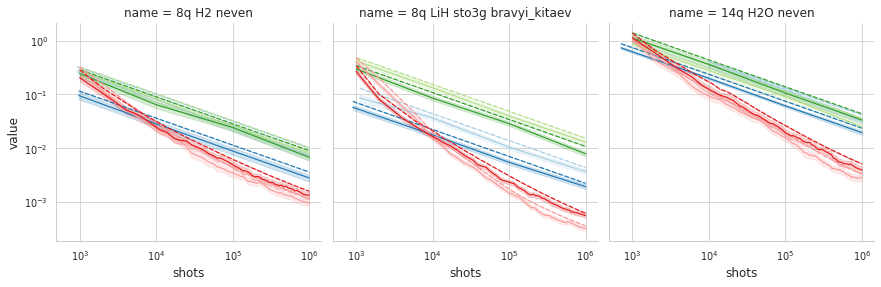

In [7]:
# Plot

sns.set(style='whitegrid')#, rc={'axes.labelsize': 12})
sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})

g = sns.relplot(
    data=pd.melt(ddf, 
                 id_vars=['shots', 'mapping', 'qubits', 'method', 'name'], 
                 value_vars=['error', 'estimated_error']), 
    x="shots", y="value",
    col="name",
    col_order=names,
    hue="method", 
    hue_order=method_order,
    style="variable", 
    kind="line",legend=None, height=4, 
    palette='Paired',
    ci=95).set(yscale ='log', xscale="log")#, ylim=(1e-4, 1)) 

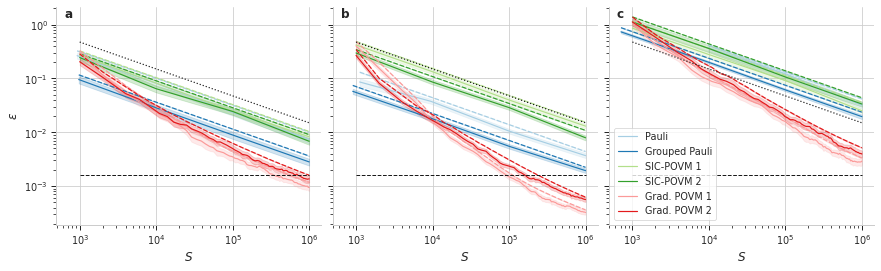

In [8]:
# Figure postprocessing

for a in g.axes:
    for r in a:
        plt.sca(r)
        #plt.grid(True, which="both")
        plt.plot([1e3, 1e6], [1.59e-3]*2, 'k--', lw=1, label='Chemical accuracy')
        plt.plot([1e3, 1e6], 15/np.sqrt(np.array([1e3, 1e6])), 'k:', label='1/sqrt(N)')
        plt.xlabel(r'$S$')
        r.set_title("")
        r.tick_params(which="both", bottom=True, left=True)

g.axes[0][0].set_ylabel(r'$\epsilon$')
g.axes[0][2].legend(g.axes[0][2].lines[:16:2], method_order, loc='lower left')

format_axes(g.axes[0], position=(.03, .95))
fig = plt.gcf()
abc_figsize = fig.get_size_inches()

plt.savefig('figures/fig2a-c.pdf', bbox_inches='tight')

### Fig. 3d. Parameters

In [9]:
from povm.povm_operator import POVMOperator, _PAULI_MATRICES
from qiskit.visualization import plot_bloch_vector

GOOGLE_PARAMS = [
        0.2838889,
        0.36284288,
        0.57602168,
        0.40456533,
        0.3999603,
        0.28235376,
        0.6941424,
        0.33333333,
    ]

In [10]:
# Data processing
pd.options.mode.chained_assignment = None # get rid of Pandas warning

def vecs_from_params(params):
    pis = POVMOperator._povm_from_unitary(POVMOperator._unitary_from_params(params))
    vecs = np.array([[np.real(np.trace(pis[i].dot(_PAULI_MATRICES[p]))) for p in ['X', 'Y', 'Z']] for i in range(4)])
    return vecs

# for name in tqdm(names):
#    for method in ['Grad-POVM', 'Grad-Google-POVM']:

name = names[0]
method = 'Grad-POVM'
method = 'Grad-Google-POVM'

print(name, method)
grad_df = df[df['method'].str.contains("Grad")]

ids = grad_df.query(f"name == '{name}' and method=='{method}'")['id'].drop_duplicates().sample(n=20)
data = grad_df.query(f'name == "{name}" and method=="{method}"')

8q H2 neven Grad-Google-POVM


In [11]:
steps = data['step'].drop_duplicates().astype(int)

num_qubits = data['qubits'].max()
data.loc[:, 'step'] = data['step'].astype(int)
max_step = data["step"].max()
data = data.drop_duplicates(['id', 'step'])
data = data.query(f'step == {max_step}')

print("Max step:", max_step)
melted_data=pd.melt(data, 
                id_vars=['shots', 'method', 'name', 'id', 'step'], 
                value_vars=[f'povm_param_{i}' for i in range(data.qubits.iloc[0]*8)])
melted_data = melted_data.dropna()
melted_data['qubit'] = melted_data['variable'].apply(lambda str: int(str.split('_')[-1]) // 8)
melted_data['qubit_param'] = melted_data['variable'].apply(lambda str: int(str.split('_')[-1]) % 8)

Max step: 75


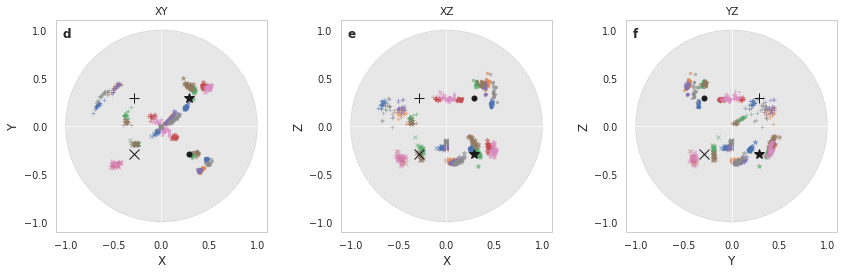

In [12]:
#fig, ax = plt.subplots(1, 3, figsize=[24, 8])

mpl.rcParams['axes.labelsize'] = 12 

fig, ax = plt.subplots(1, 3, figsize=[14, 4])

markers=['.', '*', '+', 'x']

projections = {'XY': (0, 1), 'XZ': (0, 2), 'YZ': (1, 2)}

for q in range(num_qubits):
    try:
        vecs_v = np.array([vecs_from_params(
                        np.array(
                            melted_data.query(f'qubit == {q} and id == "{aid}"').sort_values(by='qubit_param')['value'])) for aid in ids])
    except:
        print(q)
        #print(melted_data.query(f'qubit == {q} and id == "{id}"'))

    for ip, (projection, idx) in enumerate(projections.items()):        
        ax[ip].axhline(0, color='w', alpha =.2)
        ax[ip].axvline(0, color='w', alpha =.2)
        
        ax[ip].set_title(projection)
        ax[ip].add_patch(plt.Circle((0, 0), 1, color='k', alpha=.01))
        for i in range(4):
            ax[ip].plot(vecs_v[:, i, idx[0]], vecs_v[:, i, idx[1]], f'C{q}', marker=markers[i], linestyle = 'None',alpha=.5)
        ax[ip].set_aspect('equal', 'box')
        ax[ip].grid(False) 


init_params = GOOGLE_PARAMS if method == 'Grad-Google-POVM' else SIC_PARAMS
init_vecs_v = np.array([vecs_from_params(np.array(init_params)) for aid in ids])

for ip, (projection, idx) in enumerate(projections.items()):
    for i in range(4):
        ax[ip].plot(init_vecs_v[0,i,idx[0]], init_vecs_v[0,i,idx[1]], marker=markers[i], c='k', markersize=10, zorder=1000000)

    ax[ip].set_yticks([-1, -.5, 0, .5, 1])
    ax[ip].set_xlabel(projection[0])
    ax[ip].set_ylabel(projection[1])

plt.subplots_adjust(wspace=.35)
format_axes(fig.axes, position=(.03, .92), shift = 3) # add d, e, f
plt.savefig(f'figures/fig2d-f.pdf', bbox_inches='tight')

## Fig. 3. All results

In [13]:
# Data loading
df = pd.read_feather('data/chemistry.feather')

In [14]:
# Data processing
df['method'] = df['method'].replace(method_names)

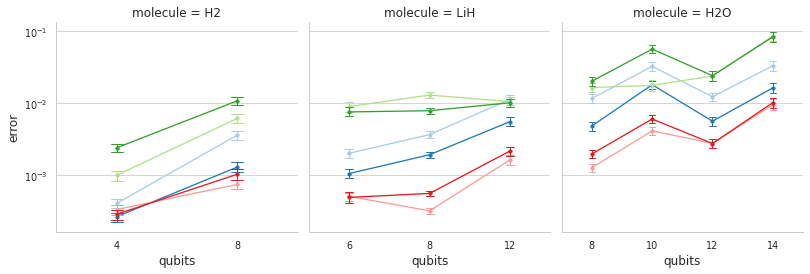

In [15]:
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})

ddf = df.query('shots > 999000 and mapping == "bravyi_kitaev"')

g = sns.catplot(
    data=ddf,
    col='molecule',
    col_order=['H2', 'LiH', 'H2O'],
    x="qubits", y="error",
    hue="method",
    sharex=False,
    hue_order=method_order,
    palette='Paired',#dodge=True,
    height=3.7,
    scale=.6,
    capsize=.1,legend=None,
    errwidth=1,
    kind='point', join=True
    ).set(yscale='log')#, ylim=[8e-5, 1.5e-1])

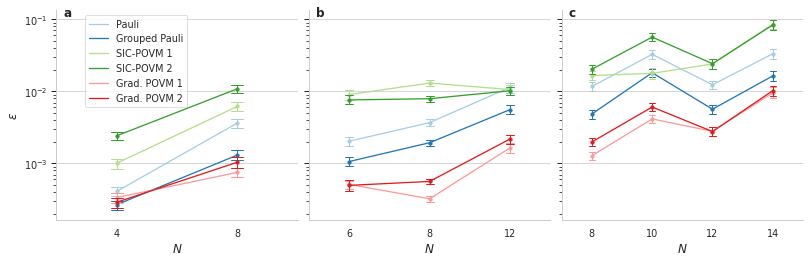

In [16]:
# Figure postprocessing

for a in g.axes:
    for r in a:
        plt.sca(r)
        #plt.grid(True, which="both")
        #plt.plot([1e3, 1e6], [1.59e-3]*2, 'k--', lw=1, label='Chemical accuracy')
        #plt.plot([1e3, 1e6], 15/np.sqrt(np.array([1e3, 1e6])), 'k:', label='1/sqrt(N)')
        plt.xlabel(r'$N$')
        r.set_title("")
        r.tick_params(which="both", left=True)

g.axes[0][0].set_ylabel(r'$\epsilon$')
#g.axes[0][2].legend(g.axes[0][2].lines[::13], method_order, loc='lower right')

g.axes[0][0].legend(g.axes[0][2].lines[::13], method_order, loc='upper left', bbox_to_anchor=(0.1, 1))
format_axes(g.axes[0], position=(.03, .97))
plt.savefig('figures/fig3.pdf', bbox_inches='tight')

### Full data figure for SM

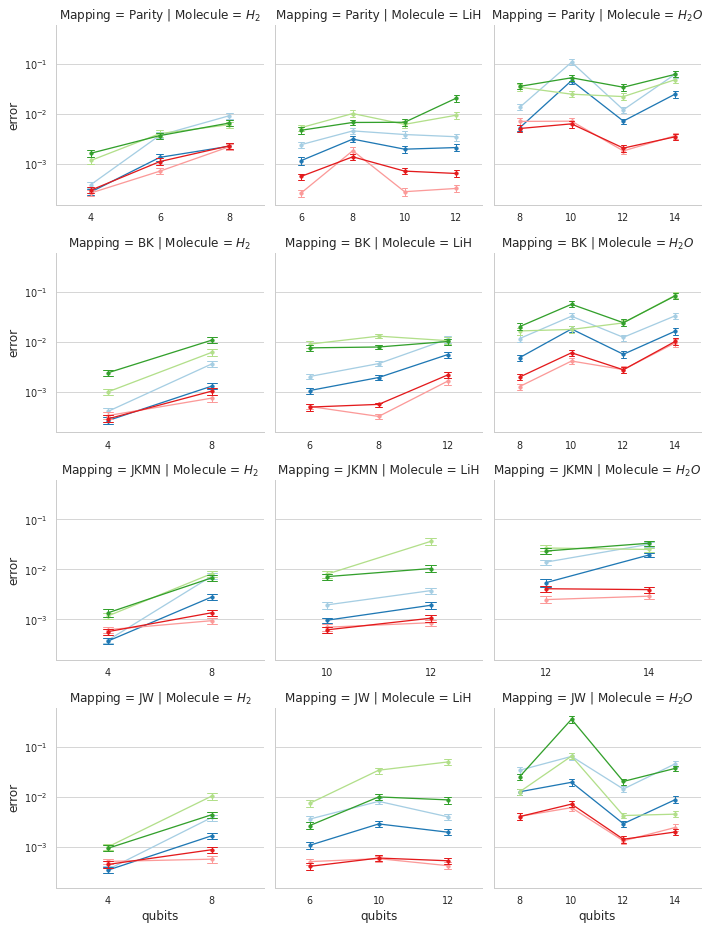

In [17]:
#sns.set_style("whitegrid")

sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})
ddf = df.query('shots > 999000')

ddf['mapping'] = ddf['mapping'].replace(mapping_names)
ddf['molecule'] = ddf['molecule'].replace({"H2O": r"$H_2O$", "H2": r"$H_2$"})

ddf = ddf.rename(columns={"method": "Method", 'molecule': "Molecule", 'mapping': 'Mapping'})
g = sns.catplot(
    data=ddf,
    col='Molecule',
    col_order=[r'$H_2$', 'LiH', r"$H_2O$"],
    row='Mapping',
    row_order=['Parity', 'BK', 'JKMN', 'JW'],
    x="qubits", y="error",
    hue="Method",
    sharex=False,
    hue_order=method_order,
    palette='Paired',#dodge=True,
    height=3.2,
    aspect=1,
    scale=.6,
    capsize=.1,
    errwidth=1,legend=False,
    kind='point', join=True
    ).set(yscale='log')#, ylim=[8e-5, 1.5e-1])

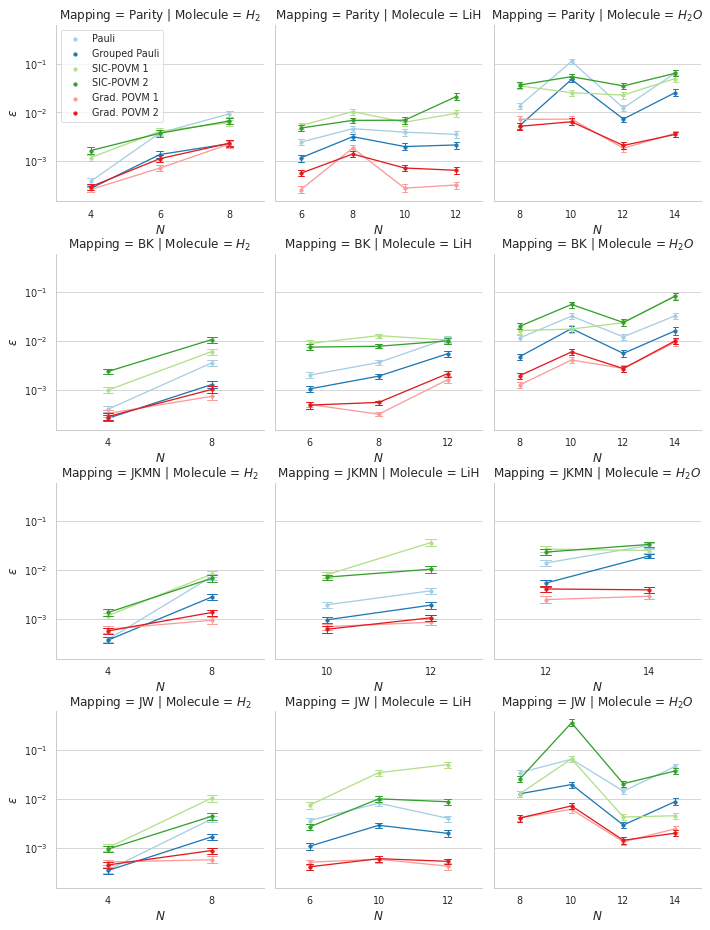

In [18]:
# Figure postprocessing
for a in g.axes:
    for r in a:
        plt.sca(r)
        #plt.grid(True, which="both")
        #plt.plot([1e3, 1e6], [1.59e-3]*2, 'k--', lw=1, label='Chemical accuracy')
        #plt.plot([1e3, 1e6], 15/np.sqrt(np.array([1e3, 1e6])), 'k:', label='1/sqrt(N)')
        r.set_xlabel(r'$N$')
        #r.tick_params(which="both", left=True)

for a in g.axes:
    a[0].set_ylabel(r'$\epsilon$')
g.axes[0][0].legend(loc='best', ncol=1)
#g.axes[0][2].legend(g.axes[0][2].lines[::13], method_order, loc='lower right')
plt.subplots_adjust(hspace=.3)
#g.axes[0][0].legend(g.axes[0][2].lines[::13], method_order, loc='upper left', bbox_to_anchor=(0.1, 1))
#format_axes(g.axes[0], position=(.03, .96))
plt.savefig('figures/fig6.pdf', bbox_inches='tight')

## Fig. 4. Scaling

In [19]:
# Data loading
df_h = pd.DataFrame(pd.read_pickle('data/hamiltonians_h_chain.pickle'))

# # Load partial data
df = pd.read_feather('data/h_chain.feather')
means_df = df.groupby(['qubits', 'mapping', 'method', 'shots']).mean()

In [20]:
# Data processing
target_accuracy = 5e-4
result = []
for method in means_df.index.get_level_values('method').drop_duplicates().tolist():
    for mapping in ['jordan_wigner', 'parity', 'bravyi_kitaev', 'neven']:
        for qubits in range(4, 16, 2):
            try:
                if 'Grad' in method:
                    extrapolated = False
                    aaa = means_df.loc[qubits, mapping, method].reset_index()
                    aaa = aaa.sort_values('error', ascending=True)
                    # Interpolate between the values that we have in order to find the required shots
                    # to reach the target accuracy.
                    # If that exceeds the range of values that we have, set it to nan
                    shots = np.interp(target_accuracy, aaa['error'], aaa['shots'], left=np.nan)
                    
                    # If we are out of our range of values, extrapolate from the last point we have,
                    # assuming a 1/sqrt(shots) dependence of the error
                    if np.isnan(shots):
                        s0 = aaa['shots'].iloc[0]
                        e0 = aaa['error'].iloc[0]
                        shots = (e0 / target_accuracy) ** 2 * s0
                        extrapolated = True 

                    result.append({'qubits': qubits, 'method': method, 'shots': shots, 'mapping':mapping, 'extrapolated': extrapolated})
                else:
                    s0 = means_df.loc[qubits, mapping, method].reset_index()['shots'].iloc[0]
                    e0 = means_df.loc[qubits, mapping, method]['error'].iloc[0]
                    shots = (e0 / target_accuracy) ** 2 * s0
                    result.append({'qubits': qubits, 'method': method, 'shots': shots, 'mapping':mapping, 'extrapolated': True})
            except:
                pass

plot_data = pd.DataFrame(result)

plot_data['log_shots']  = plot_data['shots'].apply(np.log10)
plot_data['log_qubits'] = plot_data['qubits'].apply(np.log10)

plot_data = plot_data.replace(method_names)
plot_data = plot_data.rename(columns={'method': 'Method'})

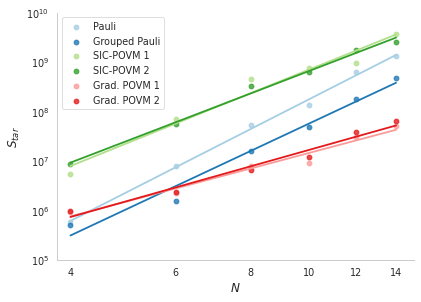

In [21]:
#Figure

sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})

g = sns.lmplot(data=plot_data.query('mapping == "neven"'), 
               x='log_qubits', y='log_shots', 
               hue='Method', hue_order=method_order, ci=None, palette='Paired', legend_out=False,
               height=4, aspect=1.4)
ax = g.ax
g.set(xlabel=r"$N$")
g.set(ylabel=r"$S_{tar}$")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:], labels=labels[:])
plt.grid(False)
xticks = np.log10(np.arange(4, 16, 2))
ax.set_xticks(xticks)
yticks =np.arange(5, 11)
ax.set_yticks(yticks)
x_formatter = lambda x, pos: f'{10 ** x:g}'
ax.get_xaxis().set_major_formatter(x_formatter)

y_formatter = lambda x, pos: r'$10^{' + str(x) + r'}$'
ax.get_yaxis().set_major_formatter(y_formatter)
#lims = np.log10(np.array([0.005, 25.]))
ax.set_xlim(np.log10(np.array([3.8, 15])))
#ax.set_ylim(lims)
plt.savefig('figures/fig4.pdf', bbox_inches='tight')

In [22]:
# Table of exponents
from scipy.optimize import curve_fit
records = []
for method in plot_data['Method'].drop_duplicates().tolist():
    for mapping in ['jordan_wigner', 'parity', 'bravyi_kitaev', 'neven']:
        tdf = plot_data.query(f'mapping == "{mapping}" and Method == "{method}"')#.groupby('qubits').mean()
        popt, pcov = curve_fit(lambda t, a, b: a + t * b,  tdf['log_qubits'], tdf['log_shots'],  p0=(1, 2))
        perr = np.sqrt(np.diag(pcov))
        records.append({'mapping': mapping, 'Method': method, 'a': popt[0], 'a_err': perr[0], "b": popt[1], 'b_err': perr[1]})

scaling_df = pd.DataFrame(records)

scaling_df['Method'] = pd.Categorical(scaling_df['Method'], method_order)
scaling_df['Exponent'] = r"$" + scaling_df['b'].round(1).astype(str) + r" \pm " + scaling_df['b_err'].round(1).astype(str) + "$"
scaling_df = scaling_df.sort_values('Method')

scaling_df['Exponent'] = r"$" + scaling_df['b'].round(1).astype(str) + r" \pm " + scaling_df['b_err'].round(1).astype(str) + "$"

print(scaling_df[['mapping', 'Method', 'Exponent']].pivot(index='Method', columns='mapping').round(1).to_latex(escape=False))

\begin{tabular}{lllll}
\toprule
{} & \multicolumn{4}{l}{Exponent} \\
mapping &  bravyi_kitaev &  jordan_wigner &          neven &         parity \\
Method        &                &                &                &                \\
\midrule
Pauli         &  $6.8 \pm 0.5$ &  $6.4 \pm 0.4$ &  $6.2 \pm 0.2$ &  $6.0 \pm 0.4$ \\
Grouped Pauli &  $6.4 \pm 0.5$ &  $5.1 \pm 0.6$ &  $5.7 \pm 0.4$ &  $5.5 \pm 0.4$ \\
SIC-POVM 1    &  $5.7 \pm 0.6$ &  $5.1 \pm 0.6$ &  $4.9 \pm 0.5$ &  $5.8 \pm 0.7$ \\
SIC-POVM 2    &  $4.4 \pm 0.4$ &  $5.6 \pm 0.7$ &  $4.7 \pm 0.2$ &  $5.4 \pm 0.5$ \\
Grad. POVM 1  &  $4.6 \pm 0.5$ &  $2.4 \pm 0.5$ &  $3.2 \pm 0.3$ &  $4.3 \pm 0.6$ \\
Grad. POVM 2  &  $4.4 \pm 0.5$ &  $3.1 \pm 0.3$ &  $3.4 \pm 0.3$ &  $4.0 \pm 0.6$ \\
\bottomrule
\end{tabular}



## Fig. 5. Tomography with IC data

In [23]:
#Data loading and processing 
fid_df = pd.read_json('data/fidelities_tomo.json', orient='records')
hamiltonians_json = pd.read_json('data/tomography_counts_data.jsonl', lines=True)

fid_df['method'].replace(method_names)
fid_df = fid_df.rename(columns={"method": "Method", 'molecule': "Molecule", 'mapping': 'Mapping'})
hamiltonians_json = hamiltonians_json.drop_duplicates('id') 
fid_df = fid_df.join(hamiltonians_json[['id', 'name']].set_index('id'), on='id')
fid_df = fid_df.rename(columns={"name": "Hamiltonian"})
fid_df['Method'].replace(method_names, inplace=True)

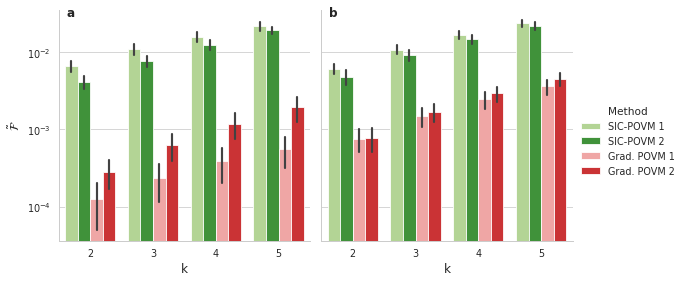

In [24]:
sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})
color_palette = {'SIC-POVM 1': sns.color_palette("Paired")[2], 
                 'SIC-POVM 2': sns.color_palette("Paired")[3], 
                 'Grad. POVM 1': sns.color_palette("Paired")[4],
                 'Grad. POVM 2': sns.color_palette("Paired")[5]}

g = sns.catplot(data=fid_df.reset_index(), 
                x='k', 
                y='infidelity', 
                hue='Method', 
                col='Hamiltonian',
                palette=color_palette, 
                hue_order=color_palette.keys(), 
                ci='sd',
                legend=True,height=4, 
                kind='bar', 
                ).set(yscale='log')


for a in g.axes:
    for b in a:
        b.set_title('')
    a[0].set_ylabel(r'$\tilde\mathcal{F}$')
    
format_axes(g.axes[0], position=(.03, .97))

    
plt.savefig('figures/fig5.pdf', bbox_inches='tight')


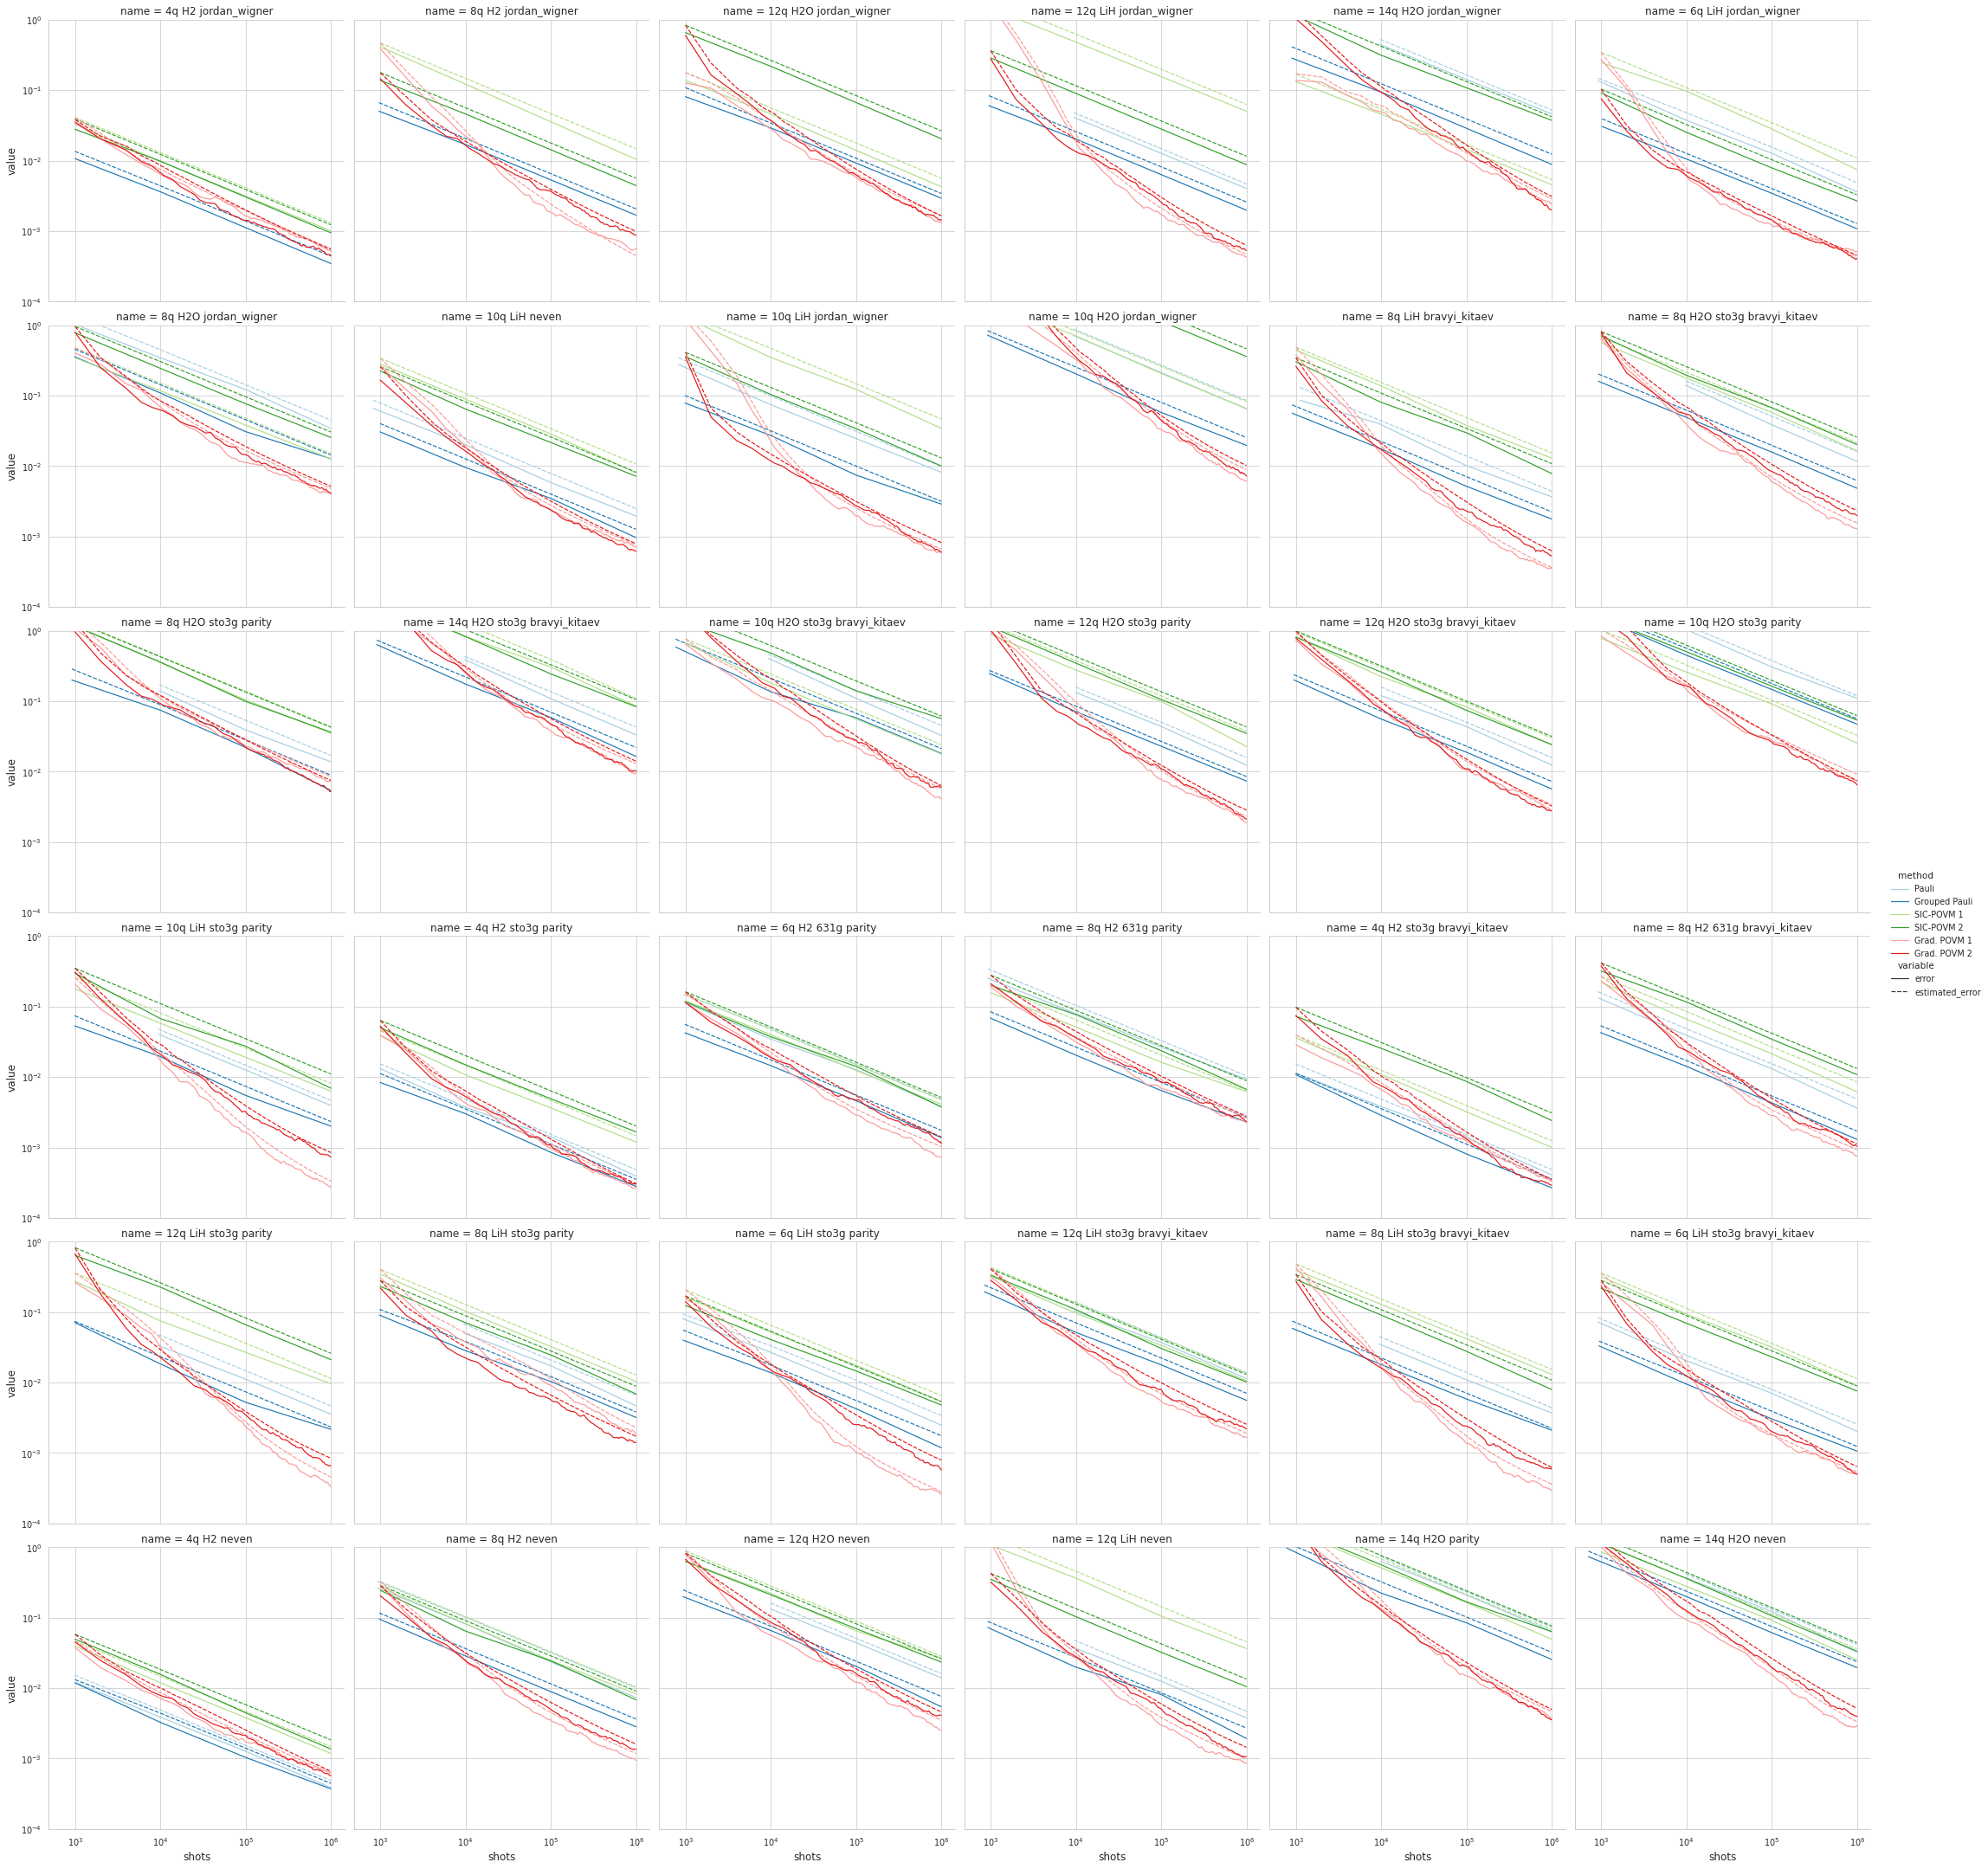

In [25]:
# Plot
# Data loading
df = pd.read_feather('data/chemistry.feather')

ddf = df.query('estimated_error > 0')
ddf['method'] = ddf['method'].replace(method_names)

sns.set(style='whitegrid')#, rc={'axes.labelsize': 12})
sns.set_context("paper", font_scale=1.1, rc={'axes.labelsize': 12})

g = sns.relplot(
    data=pd.melt(ddf, 
                 id_vars=['shots', 'mapping', 'qubits', 'method', 'name'], 
                 value_vars=['error', 'estimated_error']), 
    x="shots", y="value",
    col="name",
    col_wrap=6,
    #col_order=names,
    hue="method", 
    hue_order=method_order,
    style="variable", 
    kind="line",
    #legend=None, #height=4, 
    palette='Paired',
    ci=None).set(yscale ='log', xscale="log", ylim=(1e-4, 1)) 